In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load data from CSV
file_path = '../data/OZ_GLCM_Fullprint_ROI.csv'
data = pd.read_csv(file_path)

In [22]:
data.columns

Index(['number', 'Filename', 'category', 'class', 'duration',
       'Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90',
       'Dissimilarity 135', 'Energy 0', 'Energy 45', 'Energy 90', 'Energy 135',
       'Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135',
       'Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135',
       'Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135'],
      dtype='object')

In [3]:
# Filter columns: Keep 'category' and GLCM features starting from 'Dissimilarity'
columns_to_keep = ['category'] + [col for col in data.columns if col not in ['number', 'duration', 'Filename'] and col != 'category' and col >= 'Dissimilarity']
filtered_data = data[columns_to_keep]
print("Filtered Data (First 5 Rows):")
print(filtered_data.head())

Filtered Data (First 5 Rows):
  category  class  Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  \
0     good      0         3.499063          7.256060          5.843842   
1     good      0         3.456235          7.279184          5.796541   
2     good      0         3.481864          7.261506          5.791575   
3     good      0         3.436975          7.247104          5.860435   
4     good      0         3.418031          7.215715          5.812550   

   Dissimilarity 135  Energy 0  Energy 45  Energy 90  Energy 135  \
0           7.054348  0.924894   0.917087   0.920419    0.917509   
1           7.108720  0.923513   0.915679   0.919098    0.916031   
2           7.000845  0.923150   0.915267   0.918759    0.915912   
3           7.127631  0.920598   0.912602   0.916118    0.912848   
4           7.170898  0.920258   0.912356   0.915884    0.912544   

   Homogeneity 0  Homogeneity 45  Homogeneity 90  Homogeneity 135  
0       0.935004        0.922138        0.926988

In [4]:
# Encode the 'category' column to numeric values
label_encoder = LabelEncoder()
filtered_data['category_encoded'] = label_encoder.fit_transform(filtered_data['category'])

C:\Users\MSI\AppData\Local\Temp\ipykernel_17732\1926605297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['category_encoded'] = label_encoder.fit_transform(filtered_data['category'])


In [5]:
# Extract GLCM feature columns (numeric only, excluding 'category')
features = filtered_data.drop(columns=['category', 'category_encoded','class']).select_dtypes(include=[float, int])
print("\nGLCM Features:")
print(features.head())
if 'category' in filtered_data.columns:
    print("\nLabels (Category):")
    print(filtered_data['category'].head())


GLCM Features:
   Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  Dissimilarity 135  \
0         3.499063          7.256060          5.843842           7.054348   
1         3.456235          7.279184          5.796541           7.108720   
2         3.481864          7.261506          5.791575           7.000845   
3         3.436975          7.247104          5.860435           7.127631   
4         3.418031          7.215715          5.812550           7.170898   

   Energy 0  Energy 45  Energy 90  Energy 135  Homogeneity 0  Homogeneity 45  \
0  0.924894   0.917087   0.920419    0.917509       0.935004        0.922138   
1  0.923513   0.915679   0.919098    0.916031       0.934507        0.921504   
2  0.923150   0.915267   0.918759    0.915912       0.933454        0.920916   
3  0.920598   0.912602   0.916118    0.912848       0.931522        0.918643   
4  0.920258   0.912356   0.915884    0.912544       0.932079        0.918966   

   Homogeneity 90  Homogeneity 135  
0  

In [6]:
features 

,Dissimilarity 0,Dissimilarity 45,Dissimilarity 90,Dissimilarity 135,Energy 0,Energy 45,Energy 90,Energy 135,Homogeneity 0,Homogeneity 45,Homogeneity 90,Homogeneity 135
0,3.499063,7.256060,5.843842,7.054348,0.924894,0.917087,0.920419,0.917509,0.935004,0.922138,0.926988,0.922745
1,3.456235,7.279184,5.796541,7.108720,0.923513,0.915679,0.919098,0.916031,0.934507,0.921504,0.926278,0.921457
2,3.481864,7.261506,5.791575,7.000845,0.923150,0.915267,0.918759,0.915912,0.933454,0.920916,0.925337,0.921532
3,3.436975,7.247104,5.860435,7.127631,0.920598,0.912602,0.916118,0.912848,0.931522,0.918643,0.922888,0.918910
4,3.418031,7.215715,5.812550,7.170898,0.920258,0.912356,0.915884,0.912544,0.932079,0.918966,0.923341,0.918878
...,...,...,...,...,...,...,...,...,...,...,...,...
1420,3.647418,7.554859,6.194765,7.546807,0.915118,0.907016,0.910393,0.907027,0.926143,0.913045,0.917722,0.913071
1421,3.561293,7.498139,6.029516,7.364111,0.918595,0.910642,0.914073,0.910677,0.928564,0.915974,0.920661,0.916288
1422,3.610865,7.486472,6.039869,7.421066,0.916371,0.908446,0.911876,0.908446,0.926960,0.914087,0.919274,0.914348
1423,3.609648,7.470320,6.010213,7.361975,0.916441,0.908353,0.911829,0.908552,0.926902,0.914010,0.918925,0.914446


In [7]:
# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [8]:
# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['category'] = filtered_data['category'].values
pca_df['category_encoded'] = filtered_data['category_encoded'].values

In [9]:
# Separate data for 'good' and 'reject' categories
good_data = pca_df[pca_df['category'] == 'good']
reject_data = pca_df[pca_df['category'] == 'reject']

In [19]:
# Identify outliers in the 'good' category based on the largest values in 'PC1'
good_outliers = good_data.nlargest(2, 'PC1')  # Adjust the number of outliers as needed
good_outliers 



,PC1,PC2,PC3,category,category_encoded
843,9.844804,-0.902415,1.505262,good,0
677,9.558640,0.575629,-0.103889,good,0


In [21]:
sgood_outliers = good_data.nsmallest(5, 'PC1')  # Adjust the number of outliers as needed
sgood_outliers


,PC1,PC2,PC3,category,category_encoded
1225,-45.256059,0.103746,6.515985,good,0
568,-42.744171,-3.605353,4.856619,good,0
406,-7.219462,0.195076,-0.730128,good,0
496,-6.834175,1.938030,0.717640,good,0
498,-6.683457,1.576670,0.879165,good,0


In [10]:
# Train an SVM to find the separating hyperplane
svm = SVC(kernel='linear')
svm.fit(pca_df[['PC1', 'PC2', 'PC3']], pca_df['category_encoded'])
w = svm.coef_[0]
b = svm.intercept_[0]
print(f"Hyperplane equation: {w[0]}*PC1 + {w[1]}*PC2 + {w[2]}*PC3 + {b} = 0")

Hyperplane equation: -5.279724009987774e-05*PC1 + 0.00014814057626821864*PC2 + 5.3139137302204986e-05*PC3 + -1.0001762317149134 = 0


In [11]:
# Create a meshgrid for the hyperplane
xx, yy = np.meshgrid(np.linspace(pca_df['PC1'].min(), pca_df['PC1'].max(), 10),
                     np.linspace(pca_df['PC2'].min(), pca_df['PC2'].max(), 10))
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

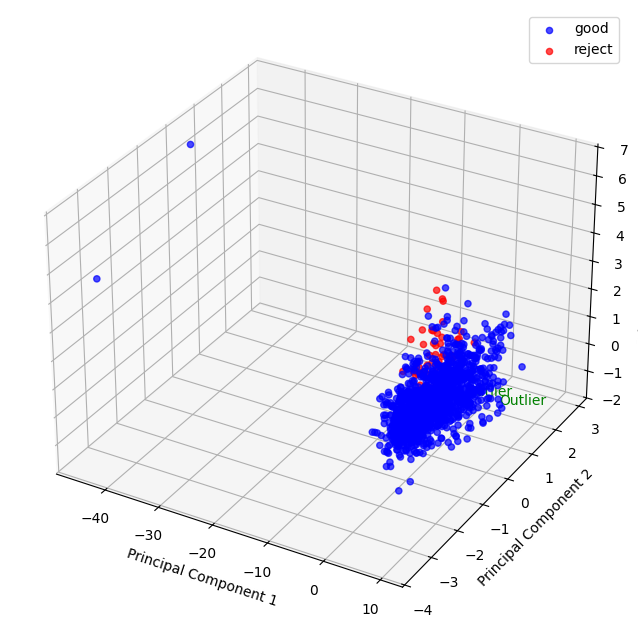

In [17]:
# Plot the PCA result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(good_data['PC1'], good_data['PC2'], good_data['PC3'], alpha=0.7, c='blue', label='good')
ax.scatter(reject_data['PC1'], reject_data['PC2'], reject_data['PC3'], alpha=0.7, c='red', label='reject')

# Highlight outliers in the 'good' category
for _, outlier in good_outliers.iterrows():
    ax.text(outlier['PC1'], outlier['PC2'], outlier['PC3'], 'Outlier', color='green', fontsize=10)

ax.legend()
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()